# hw 8
### due April 6, 12:30 pm

In this exercise we are going to play with the central limit theorem, then think about errors in prediction and (I hope) see why those are a little different.

### dataset `paris_stats`

# Q1

- **get** the dataset
- **create three variables** `train_size` equal to 25, `mhat` with the average of `field_goals_made` and sdhat with the sample standard deviation of `field_goals_made` **of the first 25 rows only**. 

In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('https://github.com/brendanrbrown/stor155_sp21/raw/main/data/paris_stats.csv')

In [3]:
d.describe()

,field_goals_made,fg_attempts,three_pt_made,three_pt_attempt
count,31.000000,31.000000,31.000000,31.000000
mean,7.290323,15.612903,2.000000,4.935484
std,3.100468,3.972215,1.549193,2.462187
min,3.000000,8.000000,0.000000,0.000000
25%,5.000000,12.000000,1.000000,3.000000
50%,7.000000,16.000000,2.000000,5.000000
75%,9.500000,18.500000,3.000000,7.000000
max,15.000000,23.000000,5.000000,10.000000


In [4]:
# those of you who are somewhat more advanced programmers 
# should consider writing a function to do this split randomly, taking train_size as argument

# train_size sort of dumb for the python group, but just to be consistent
train_size = 25
dtrain = d.loc[:train_size-1]
dtest = d.loc[train_size:]

In [5]:
dtest

,game,field_goals_made,fg_attempts,three_pt_made,three_pt_attempt
25,gtech,6,15,1,3
26,louisville,5,12,2,5
27,syracuse,5,15,2,8
28,duke,3,11,3,7
29,boston college,12,22,4,5
30,nc state,9,23,4,10


In [6]:
#mhat, sdhat = dtrain.field_goals_made.mean(), dtrain.field_goals_made.std()

mhat = dtrain.field_goals_made.mean() 
sdhat = dtrain.field_goals_made.std()

In [7]:
mhat, sdhat

(7.44, 3.110198278781167)

# Q2

- **generate 40 random samples of size `train_size`** from the first `train_size` number of rows of the data (first `train_size` number of games)
- for each sample of `field_goals_made`, **calculate** the average and save it as a variable called `mhat_samp`

*Hint:* Do almost exactly what you did in previous homeworks

In [8]:
mhat_samp = []

for i in range(40):
    mhat_samp.append(dtrain.sample(train_size, replace = True))

In [9]:
# or do it this way

mhat_samp = [dtrain.sample(25, replace = True).field_goals_made.mean() for i in range(40)]

In [10]:
mhat_samp = pd.Series(mhat_samp)

In [11]:
mhat_samp

0     7.20
1     6.60
2     7.08
3     7.56
4     7.56
5     7.52
6     8.20
7     7.32
8     6.60
9     8.44
10    7.32
11    6.44
12    7.60
13    7.96
14    8.76
15    7.36
16    7.28
17    8.16
18    7.32
19    6.44
20    7.48
21    6.56
22    7.08
23    7.84
24    7.84
25    7.12
26    7.40
27    9.00
28    7.04
29    6.56
30    7.40
31    7.52
32    6.76
33    8.00
34    8.08
35    7.24
36    7.88
37    7.36
38    7.40
39    7.80
dtype: float64

# Q3

- **plot a histogram** of `mhat_samp`

<AxesSubplot:ylabel='Frequency'>

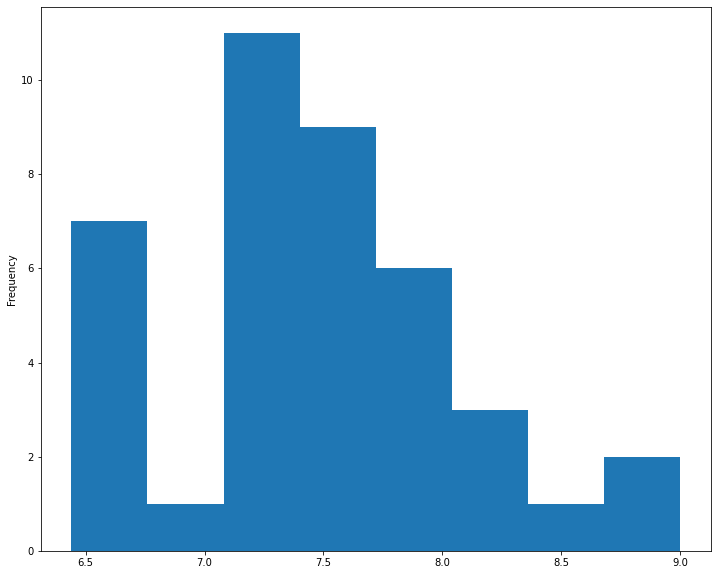

In [12]:
mhat_samp.plot.hist(figsize = (12, 10), bins = 8)

# Q4

- **calculate** the *sample* standard deviation of `mhat_samp`
- **calculate** the *theoretical* standard deviation (approximate) of `mhat_samp` using the central limit theorem and your answers from Q1

In [14]:
mhat_samp.std(), sdhat/(train_size)**.5

(0.6012772729567939, 0.6220396557562334)

# Q5

- **compare** your answers in Q4 and explain in a sentence whether or not it makes sense using concepts from class

The two numbers above should be close. This is a consequence of the law of large numbers. mhat_samp.std() is the sample s.d. of a random sample of size 25. We are calculating a *point estimate* for the standard deviation of Xbar_n (sample mean for a sample of size 25) using 40 independent observations of mhat_samp. 40, it seems, is big enough to give a good point estimate.

# Q6
Now suppose you use `mhat` from Q1 to predict the number of field goals made in the last 6 games of the dataset. This is different from what we did in class. Here you are just using the average number of field goals made as your 'model'.

- **create** a new variable called `predict_errsq` which is the the *squared* difference between `mhat` and `field_goals_made` in the final 6 games of the dataset
- **calculate** the average of `predict_errsq` then take its square root. This statistic is called the 'root mean squared error' (RMSE).

$$RMSE = \sqrt{\frac{1}{6}\sum_{i = 26}^{31}(\text{field_goals_made}_i - \text{mhat})^2}$$

Observe (you don't need to write anything) the difference between this last quantity and the theoretical CLT standard deviation. Compare the formula for root mean squared error to that of standard deviation.

The reason they differ is that the CLT *does not* make any claims about the error of the prediction, only about the distribution of `mhat` when doing exactly what you did in Q2-Q4.

To understand how accurate a model might be when applied to new data, a standard method is to do **cross validation** --- which we won't cover in this class.

See https://en.wikipedia.org/wiki/Cross-validation_(statistics) or the textbook https://web.stanford.edu/~hastie/ElemStatLearn/

In [43]:
predict_errsq = (dtest.loc[:, "field_goals_made"] - mhat)**2

In [47]:
predict_errsq = (dtest.field_goals_made - mhat)**2

In [46]:
predict_errsq.mean()**.5

3.080086578869713